# TRABAJO 1: ENSEMBLE LEARNING | MACHINE LEARNING II
## Feb 2023
--- 

### GRUPO: xxxx
- Nombre y Apellidos
- Nombre y Apellidos
- ...
- Nombre y Apellidos

1.1 Análisis Exploratorio - Blanca --> OK

1.2 Simple Tree - Blanca --> OK

1.3 Bagged Tree - Ana 

1.4 Random Forest - Marta --> OK

1.5 Gradient Boosting - Mariajo --> OK

1.6 Stacking - Enrique 

1.7 PCA - Ana

1.8 Comparacion - Mariajo

2.1 Validacion - Marta

2.2 Analisis dias mal clasificados - Enrique

--- 

**IMPORTANTE:**
- Asegúrate, fijando la semilla de los nº aleatorios según proceda, que si se vuelve a ejecutar el cuaderno los resultados son idénticos
- Responde a las preguntas planteadas utilizando instrucciones "print" que permitan leer cómodamente como resultado de la ejecución de la celda el texto explicativo junto a las figuras o tablas a las que haga referencia (mira el ejemplo en la primera gráfica que se representa). También puedes usar markdown para responder.
- No escribas líneas de código muy largas, tienes una regla para ayudarte a no hacerlo
- No cambies la estructura del documento, respeta las secciones que ya existen


---
Importamos todos los paquetes aquí por comodidad

In [1]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from mltools import model_tools as MT
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from mltools import classification_tools as CT
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

from sklearn.ensemble import RandomForestClassifier

# For reproducibility
import pickle

import warnings
warnings.filterwarnings("ignore")

c:\Users\marti\anaconda3\envs\ml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 1. AJUSTE DE LOS MODELOS CON EL DATASET AJU_DATOS_DEM_C3

Se trata de estimar la variable FESTIVO (1: el día es festivo) a partir de las variables disponibles en el dataset que se consideren oportunas. NO se pueden utilizar como variables de entrada: FECHA, DIA ni ANNO. La FECHA es interesante manejarla simplemente como ayuda para entender lo que esté pasando.

Se deben ajustar diferentes modelos, buscando un buen compromiso entre la complejidad y el error en cada uno de ellos. El objetivo es conseguir un buen modelo con una gran capacidad de acierto en el futuro. Modelos que deben crearse, analizando los resultados de cada uno de ellos (errores e importancias de las variables):
- Simple tree
- Bagged  tree
- Random Forest
- Gradient boosting
- Stacking

Carga de datos

In [2]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|

df_aju = pd.read_csv('AJU_DATOS_DEM_C3.csv')

# parseamos la fecha (cadena) para que sea un datetime con formato dd/mm/yyyy 
# esta variable NO se puede utilizar como entrada en los modelos
df_aju.FECHA = pd.to_datetime(df_aju.FECHA, format='%d/%m/%Y') 
s=df_aju.loc[:,'FECHA']
df_aju['FECHA'] =  s.dt.date

# eliminamos las variables que no se pueden usar como entradas en los modelos
del df_aju['ANNO']
del df_aju['DIA']

print('Tamaño de df_orig con los datos cargados:', df_aju.shape)
print('Dataframe con todos los datos leidos (filas: días, columnas: variables):')
df_aju

Tamaño de df_orig con los datos cargados: (2879, 30)
Dataframe con todos los datos leidos (filas: días, columnas: variables):


,FECHA,CR00,CR01,CR02,CR03,CR04,CR05,CR06,CR07,CR08,...,CR19,CR20,CR21,CR22,CR23,MES,DIASEM,FESTIVO,TMIN,TMAX
0,2014-01-01,0.040942,0.038985,0.036382,0.034416,0.033409,0.033420,0.034054,0.034229,0.035889,...,0.055197,0.054185,0.051063,0.046240,0.041000,1,3,1,12.3,20.2
1,2014-01-02,0.033950,0.030996,0.029517,0.028966,0.029165,0.030150,0.032944,0.036510,0.041196,...,0.055820,0.054451,0.051482,0.046145,0.040880,1,4,0,12.0,20.1
2,2014-01-03,0.035463,0.032112,0.030292,0.029521,0.029450,0.030515,0.033188,0.036656,0.041052,...,0.055230,0.053520,0.050286,0.045412,0.040025,1,5,0,13.2,21.0
3,2014-01-04,0.035959,0.032772,0.031034,0.030178,0.030135,0.030782,0.032598,0.034982,0.039299,...,0.053757,0.052620,0.049973,0.044970,0.040386,1,6,0,14.4,23.4
4,2014-01-05,0.037506,0.034148,0.031878,0.031126,0.030930,0.031604,0.033066,0.034803,0.038758,...,0.052902,0.051481,0.049655,0.045730,0.040905,1,7,0,12.8,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,2021-12-27,0.033180,0.031299,0.030173,0.029493,0.029649,0.030814,0.033925,0.037837,0.042098,...,0.051685,0.050563,0.047267,0.042237,0.037797,12,1,0,16.1,23.0
2875,2021-12-28,0.033823,0.031731,0.030385,0.029950,0.030017,0.031203,0.034708,0.038432,0.042645,...,0.051867,0.050971,0.047718,0.042585,0.037774,12,2,0,16.6,22.7
2876,2021-12-29,0.034475,0.032198,0.030902,0.030441,0.030384,0.031487,0.034454,0.038381,0.042850,...,0.052136,0.050604,0.046788,0.042033,0.037595,12,3,0,14.3,21.3
2877,2021-12-30,0.034345,0.031919,0.030524,0.029991,0.030087,0.031286,0.034384,0.038574,0.042778,...,0.052092,0.050993,0.047587,0.042807,0.038252,12,4,0,13.4,26.4


Visión general de las series

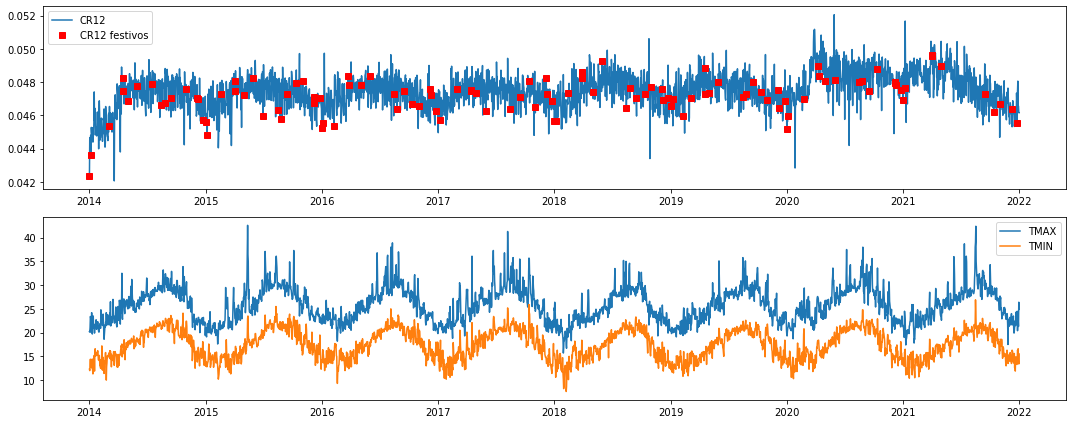

Se observa que el nº de festivos (115) es claramente inferior al nº de laborables (2764)
En concreto, el porcentaje de festivos en el conjunto de ajuste es 3.99444251476207 %


In [3]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|
fig = plt.figure(1, figsize=(15,6))
ax1 = plt.subplot(2,1,1)

ind_festivo = df_aju.FESTIVO == 1

plt.plot(df_aju.FECHA, df_aju.CR12, label='CR12')

plt.plot(df_aju.FECHA[ind_festivo], df_aju.CR12[ind_festivo], 'sr', label='CR12 festivos')
plt.legend()

plt.subplot(2,1,2,sharex= ax1)
plt.plot(df_aju.FECHA, df_aju.TMAX, label='TMAX')
plt.plot(df_aju.FECHA, df_aju.TMIN, label='TMIN')
plt.tight_layout()
plt.legend()

plt.show()

num_festivos = np.count_nonzero(df_aju.FESTIVO)
num_laborables = df_aju.shape[0] - num_festivos
print(f'Se observa que el nº de festivos ({num_festivos}) es claramente inferior al nº de laborables ({num_laborables})')
print(f'En concreto, el porcentaje de festivos en el conjunto de ajuste es {100*num_festivos /  df_aju.shape[0]} %')
# fig.savefig('figura1.pdf')

---
### 1.1 Análisis exploratorio básico del problema

- Incluye un análisis que te permita comprender la naturaleza del problema, cómo son las variables de entrada, su interrelación, así como su relación con la variable de salida
- Comenta todo lo que parezca relevante para el tema tratado, incluyendo todas las gráficas que consideres oportunas
- Estudia cómo se reparten los festivos según el día de la semana y los meses

In [4]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|
df_aju['FESTIVO'] = df_aju['FESTIVO'].astype('category')

#### Prepara los conjuntos de entrenamiento y test

- Divide los datos disponibles de ajuste (df_aju) en dos conjuntos diferentes (TR:80% y TS: 20%). TS lo deberías de utilizar para validar la calidad de los diferentes modelos que se creen.
- Recuerda fijar una semilla para garantizar que la separación es reproducible

In [20]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|

# Define input and output matrices
INPUTS = df_aju.columns[~df_aju.columns.isin(['FESTIVO', 'FECHA', ''])]
OUTPUT = 'FESTIVO'
X = df_aju[INPUTS]
y = df_aju[OUTPUT]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  #percentage of test data
                                                    random_state=0, #seed for replication
                                                    stratify = y)   #Preserves distribution of y

# Crea dos dataframes df_aju_tr y df_aju_ts y trabaja con ellos
df_aju_tr = X_train.copy()
df_aju_tr['FESTIVO'] = y_train # We will call Y as output variable for simplicity
df_aju_ts = X_test.copy()
df_aju_ts['FESTIVO'] = y_test # We will call Y as output variable for simplicity>

#### 1.2. Ajusta un modelo de clasificación sencillo que sea robusto y que pueda servir de referencia de comparación con otros modelos más complejos.

- Optimiza la complejidad
- Revisa los errores en TR y TS, la matrices de confusión, y verifica la capacidad de generación
- Analiza la lógica que emplea para determinar si es festivo
- Revisa la importancia de las variables

In [8]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|


#### 1.3. Ajusta un bagged tree para resolver el problema planteado.

- Optimiza la complejidad
- Revisa los errores en TR y TS, la matrices de confusión, y verifica la capacidad de generación
- Revisa la importancia de las variables

In [9]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|

#### 1.4. Ajusta un random forest para resolver el problema planteado.

- Optimiza la complejidad
- Revisa los errores en TR y TS, la matrices de confusión, y verifica la capacidad de generación
- Revisa la importancia de las variables

In [25]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|
# find optim nº of trees in the ensemble and max_features
param = {'RF__max_features': range(5, 26, 1), # Number number of features to consider when looking for the best split
         'RF__n_estimators': range(20, 100, 5), # Number of trees in the forest
        #  'RF__min_samples_split': range(3, 12, 1), # Minimum number of obs in node to keep cutting'
         } 

pipe =  Pipeline(steps=[('scaler', StandardScaler()), 
                        ('RF', 
                            RandomForestClassifier(
                                        criterion='gini',  # impurity measure
                                        class_weight='balanced', # Weights associated with classes
                                        min_samples_split=6, # Minimum number of obs in node to keep cutting
                                        min_samples_leaf=1, # Minimum number of obs in a terminal node  
                                        # max_features='auto', # GS_CV - Number of features to consider when looking for the best split
                                        # n_estimators=80, # GS_CV -  Number of trees in the forest
                                        random_state=0)
                        )])

# We use Grid Search Cross Validation to find the best parameter for the model in the grid defined 
nFolds = 10
rf_fit = GridSearchCV(estimator=pipe, # Structure of the model to use
                       param_grid=param, # Defined grid to search in
                       n_jobs=-1, # Number of cores to use (parallelize)
                       scoring='f1', # F1 https://scikit-learn.org/stable/modules/model_evaluation.html
                       cv=nFolds) # Number of Folds 
# fit the bagged trees
INPUTS_RF = INPUTS  
rf_fit.fit(X_train[INPUTS_RF], y_train) # Search in grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(class_weight='balanced',
                                                               min_samples_split=6,
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'RF__max_features': range(5, 26),
                         'RF__n_estimators': range(20, 100, 5)},
             scoring='f1')

In [40]:
# Guardamos el modelo entrenado para agilizar la parte de validación
filename = "./models/random_forest_v2.pickle"
# save model
pickle.dump(rf_fit, open(filename, "wb"))

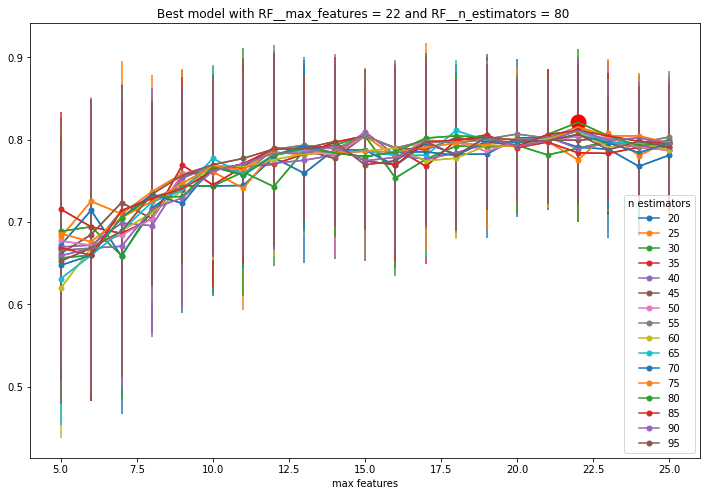

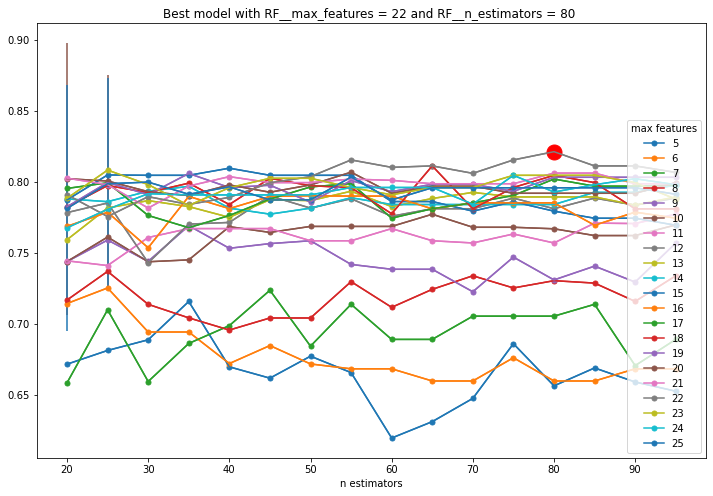

In [26]:
MT.plotModelGridError(rf_fit)

In [27]:
# Almacenamos en una variable el mejor modelo encontrado por GridSearchCV
RF_class_estim = rf_fit.best_estimator_['RF']

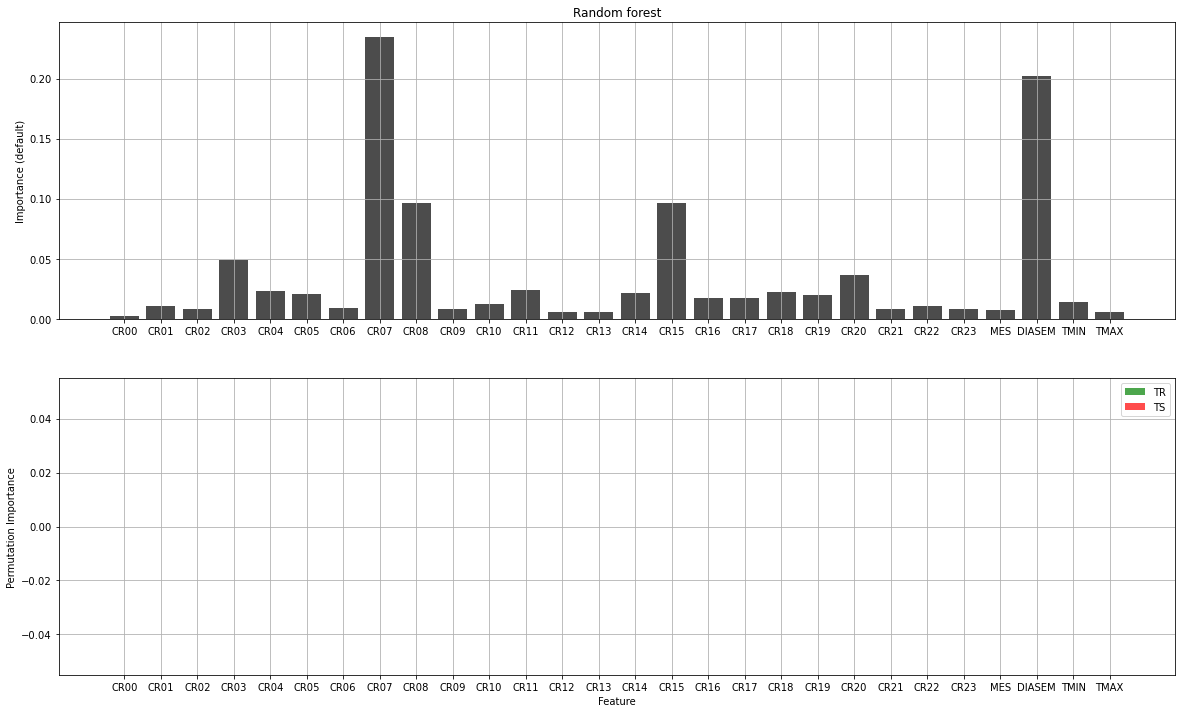

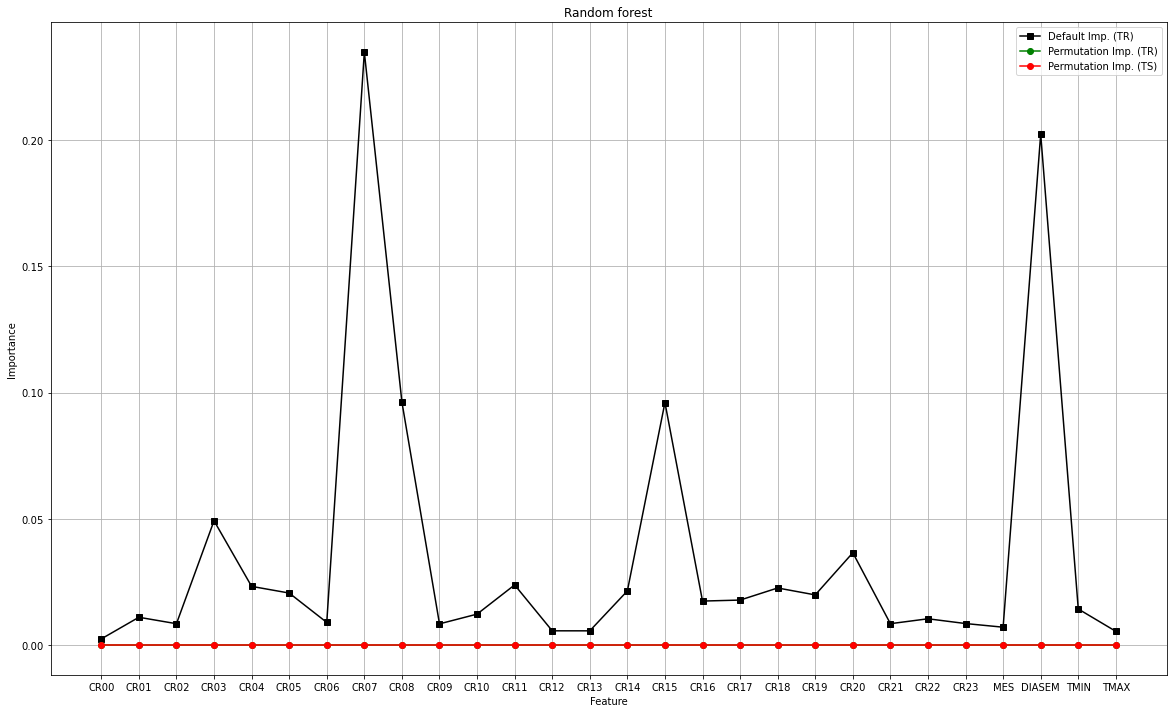

In [28]:
# Importancia de las variables de entrada en el modelo
## Feature importance evaluation using "Permutation Importance" (training and test)
importances_tr_RF_class_estim = permutation_importance(RF_class_estim, 
                                    X_train[INPUTS_RF], y_train,
                                    n_repeats=10,
                                    random_state=0)

importances_ts_RF_class_estim = permutation_importance(RF_class_estim, 
                                    X_test[INPUTS_RF], y_test,
                                    n_repeats=10,
                                    random_state=0)
 
## Plot importances

# Plot the variable importance of each feature given by feature_importances_ attribute
plt.figure(figsize=(20, 12))

plt.subplot(2,1,1)
plt.bar(INPUTS_RF, RF_class_estim.feature_importances_, color='black', alpha=0.7)
plt.ylabel('Importance (default)')
plt.title('Random forest')
plt.grid()

plt.subplot(2,1,2)
plt.bar(INPUTS_RF, importances_tr_RF_class_estim.importances_mean, color='green', alpha=0.7, label='TR')
plt.bar(INPUTS_RF, importances_ts_RF_class_estim.importances_mean, color='red', alpha=0.7, label='TS')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.legend()
plt.grid()
plt.show()

# Plot the variable importances of each feature (all together)
plt.figure(figsize=(20, 12))

plt.plot(INPUTS_RF, RF_class_estim.feature_importances_, 's-',  color='black', label='Default Imp. (TR)')
plt.plot(INPUTS_RF, importances_tr_RF_class_estim.importances_mean, 'o-', color='green', label='Permutation Imp. (TR)')
plt.plot(INPUTS_RF, importances_ts_RF_class_estim.importances_mean, 'o-', color='red', label='Permutation Imp. (TS)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random forest')
plt.legend()
plt.grid()
plt.show()

In [29]:
# model predictions in training (TR) and test (TS) sets
clf = rf_fit
y_train_pred = clf.predict(X_train[INPUTS_RF]).tolist()
y_test_pred = clf.predict(X_test[INPUTS_RF]).tolist()

# main metrics
acc_tr = metrics.accuracy_score(y_train,y_train_pred)
acc_ts = metrics.accuracy_score(y_test,y_test_pred)

acc_bal_tr = metrics.balanced_accuracy_score(y_train,y_train_pred)
acc_bal_ts = metrics.balanced_accuracy_score(y_test,y_test_pred)

dfacc =  pd.DataFrame([[acc_tr, acc_ts], [acc_bal_tr, acc_bal_ts]], index= ['Accuracy', 'Balanced accuracy'],  columns=['TR', 'TS'])
print(dfacc)

print('\nMETRICS TRAINING:')
CT.confusion_matrix(y_train, y_train_pred, labels=[1, 0])
print('\nMETRICS TEST SET:')
CT.confusion_matrix(y_test, y_test_pred, labels=[1, 0])

                    TR        TS
Accuracy           1.0  0.986111
Balanced accuracy  1.0  0.846922

METRICS TRAINING:
Confusion Matrix and Statistics
	   Prediction
 Reference  1    0
         1 92    0
         0  0 2211

Accuracy: 1.0
No Information Rate: 0.92
P-Value [Acc > NIR]: 0.0
Kappa: 1.0
Mcnemar's Test P-Value: 1.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Recall: 1.0
Prevalence: 0.96
Detection Rate: 0.96
Detection prevalence: 0.96
Balanced accuracy: 1.0
F1 Score: 1.0
Positive label: 1

METRICS TEST SET:
Confusion Matrix and Statistics
	   Prediction
 Reference  1   0
         1 16   7
         0  1 552

Accuracy: 0.99
No Information Rate: 0.93
P-Value [Acc > NIR]: 0.0
Kappa: 0.79
Mcnemar's Test P-Value: 0.07
Sensitivity: 1.0
Specificity: 0.7
Precision: 0.94
Recall: 0.7
Prevalence: 0.96
Detection Rate: 0.96
Detection prevalence: 0.97
Balanced accuracy: 0.85
F1 Score: 0.8
Positive label: 1


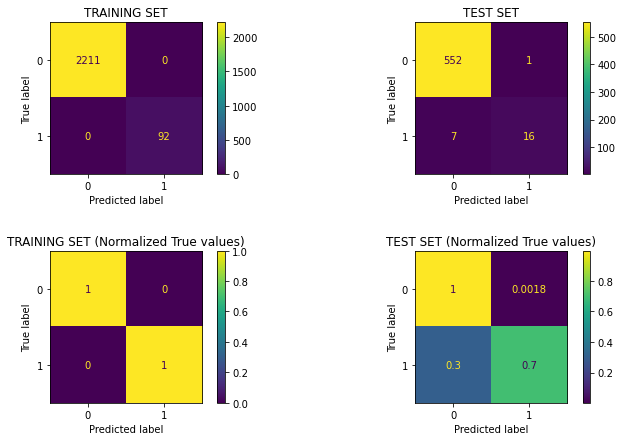

In [30]:
fig = plt.figure(figsize=(12, 7))

ax = plt.subplot(2,2,1)
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, ax = ax)
plt.title ('TRAINING SET')

ax = plt.subplot(2,2,2)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax = ax)
plt.title ('TEST SET')


ax = plt.subplot(2,2,3)
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, ax = ax, normalize = 'true')
plt.title ('TRAINING SET (Normalized True values)')

ax = plt.subplot(2,2,4)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax = ax, normalize = 'true')
plt.title ('TEST SET (Normalized True values)')

plt.subplots_adjust(hspace=0.5)  # Ajuste de espacio vertical entre filas

plt.show()

In [53]:
# Revisar los best params del modelo
rf_fit.best_params_


{'RF__max_features': 22, 'RF__n_estimators': 80}

In [56]:
# Balancea las clases en el conjunto de entrenamiento utilizando submuestreo
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_balanced, y_train_balanced = undersample.fit_resample(X_train, y_train)


In [57]:
# Probar esto con los mejores parámetros
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

# Define pipeline with SMOTE to balance classes
pipe_balanced = imbalanced_make_pipeline(SMOTE(random_state=0), 
                                        RandomForestClassifier(
                                            criterion='gini',  # impurity measure
                                            class_weight='balanced', # Weights associated with classes
                                            min_samples_split=6, # Minimum number of obs in node to keep cutting
                                            min_samples_leaf=1, # Minimum number of obs in a terminal node  
                                            max_features=22, # GS_CV - Number of features to consider when looking for the best split
                                            n_estimators=80, # GS_CV -  Number of trees in the forest
                                            random_state=0))

In [58]:
# Fit the balanced pipeline
pipe_balanced.fit(X_train[INPUTS_RF], y_train)

# Make predictions on the training and test sets
y_train_pred2 = pipe_balanced.predict(X_train_balanced[INPUTS_RF]).tolist()
y_test_pred2 = pipe_balanced.predict(X_test[INPUTS_RF]).tolist()

# Calculate the accuracy and balanced accuracy scores
acc_tr2 = metrics.accuracy_score(y_train_balanced, y_train_pred2)
acc_ts2 = metrics.accuracy_score(y_test, y_test_pred2)
acc_bal_tr2 = metrics.balanced_accuracy_score(y_train_balanced, y_train_pred2)
acc_bal_ts2 = metrics.balanced_accuracy_score(y_test, y_test_pred2)

# Print the accuracy and balanced accuracy scores
dfacc = pd.DataFrame(
    [[acc_tr2, acc_ts2], [acc_bal_tr2, acc_bal_ts2]],
    index=['Accuracy', 'Balanced accuracy'],
    columns=['TR', 'TS'])
print(dfacc)

# Se crean las confusion matrixs
print('\nMETRICS TRAINING:')
CT.confusion_matrix(y_train_balanced, y_train_pred2, labels=[1, 0])
print('\nMETRICS TEST SET:')
CT.confusion_matrix(y_test, y_test_pred2, labels=[1, 0]) 

                         TR        TS
Accuracy           0.994565  0.979167
Balanced accuracy  0.994565  0.822470

METRICS TRAINING:
Confusion Matrix and Statistics
	   Prediction
 Reference  1  0
         1 91  1
         0  0 92

Accuracy: 0.99
No Information Rate: 0.5
P-Value [Acc > NIR]: 0.0
Kappa: 0.99
Mcnemar's Test P-Value: 1.0
Sensitivity: 1.0
Specificity: 0.99
Precision: 1.0
Recall: 0.99
Prevalence: 0.5
Detection Rate: 0.5
Detection prevalence: 0.51
Balanced accuracy: 0.99
F1 Score: 0.99
Positive label: 1

METRICS TEST SET:
Confusion Matrix and Statistics
	   Prediction
 Reference  1   0
         1 15   8
         0  4 549

Accuracy: 0.98
No Information Rate: 0.93
P-Value [Acc > NIR]: 0.01
Kappa: 0.7
Mcnemar's Test P-Value: 0.39
Sensitivity: 0.99
Specificity: 0.65
Precision: 0.79
Recall: 0.65
Prevalence: 0.96
Detection Rate: 0.95
Detection prevalence: 0.97
Balanced accuracy: 0.82
F1 Score: 0.71
Positive label: 1


In [67]:
# Guardamos el modelo entrenado para agilizar la parte de validación
filename = "./models/random_forest_v2.pickle"
# save model
pickle.dump(pipe_balanced, open(filename, "wb"))

In [69]:
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Define pipeline with SMOTE to balance classes
pipe_balanced = imbalanced_make_pipeline(RandomForestClassifier(
                                            criterion='gini',  # impurity measure
                                            class_weight='balanced', # Weights associated with classes
                                            min_samples_split=6, # Minimum number of obs in node to keep cutting
                                            min_samples_leaf=1, # Minimum number of obs in a terminal node  
                                            max_features=22, # GS_CV - Number of features to consider when looking for the best split
                                            n_estimators=80, # GS_CV -  Number of trees in the forest
                                            random_state=0))

# Fit the balanced pipeline
pipe_balanced.fit(X_train[INPUTS_RF], y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features=22, min_samples_split=6,
                                        n_estimators=80, random_state=0))])

In [70]:
# model predictions in training (TR) and test (TS) sets
clf = pipe_balanced
y_train_pred = clf.predict(X_train[INPUTS_RF]).tolist()
y_test_pred = clf.predict(X_test[INPUTS_RF]).tolist()

# main metrics
acc_tr = metrics.accuracy_score(y_train,y_train_pred)
acc_ts = metrics.accuracy_score(y_test,y_test_pred)

acc_bal_tr = metrics.balanced_accuracy_score(y_train,y_train_pred)
acc_bal_ts = metrics.balanced_accuracy_score(y_test,y_test_pred)

dfacc =  pd.DataFrame([[acc_tr, acc_ts], [acc_bal_tr, acc_bal_ts]], index= ['Accuracy', 'Balanced accuracy'],  columns=['TR', 'TS'])
print(dfacc)

print('\nMETRICS TRAINING:')
CT.confusion_matrix(y_train, y_train_pred, labels=[1, 0])
print('\nMETRICS TEST SET:')
CT.confusion_matrix(y_test, y_test_pred, labels=[1, 0])

                         TR        TS
Accuracy           0.999774  0.979167
Balanced accuracy  0.999774  0.843305

METRICS TRAINING:
Confusion Matrix and Statistics
	   Prediction
 Reference    1    0
         1 2210    1
         0    0 2211

Accuracy: 1.0
No Information Rate: 0.5
P-Value [Acc > NIR]: 0.0
Kappa: 1.0
Mcnemar's Test P-Value: 1.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Recall: 1.0
Prevalence: 0.5
Detection Rate: 0.5
Detection prevalence: 0.5
Balanced accuracy: 1.0
F1 Score: 1.0
Positive label: 1

METRICS TEST SET:
Confusion Matrix and Statistics
	   Prediction
 Reference  1   0
         1 16   7
         0  5 548

Accuracy: 0.98
No Information Rate: 0.93
P-Value [Acc > NIR]: 0.01
Kappa: 0.72
Mcnemar's Test P-Value: 0.77
Sensitivity: 0.99
Specificity: 0.7
Precision: 0.76
Recall: 0.7
Prevalence: 0.96
Detection Rate: 0.95
Detection prevalence: 0.96
Balanced accuracy: 0.84
F1 Score: 0.73
Positive label: 1


#### 1.5. Ajusta un gradient boosting para resolver el problema planteado.

- Optimiza la complejidad
- Revisa los errores en TR y TS, la matrices de confusión, y verifica la capacidad de generación
- Revisa la importancia de las variables

In [18]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|


#### 1.6. Utiliza staking con tus mejores tres modelos para intentar mejorar la soluciones obtenidas.
- Revisa los errores en TR y TS, la matrices de confusión, y verifica la capacidad de generación

In [19]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|


#### 1.7. Crea un número de variables reducido que contengan la información recogida en las variables CR00 a CR23 y crea un árbol sencillo basado en estas variables.
- El conjunto de variables creado tienen que ser una combinación lineal de CR00, ..., CR23
- Optimiza la complejidad del árbol
- Revisa los errores en TR y TS, la matrices de confusión, y verifica la capacidad de generación
- Analiza la lógica que emplea para determinar si es festivo
- Revisa la importancia de las variables, explicando el significado físico de las variables más importantes
- Compara los errores en TR y TS y la lógica del modelo con el creado anteriormente en el apartado 1.2.


In [20]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|


#### 1.8 Compara todos los modelos creados en términos de complejidad, interpretabilidad y errores
- Discute el posible impacto que tiene en los modelos el que existan menos festivos que laborables
- Compara la complejidad en términos de nº de parámetros y estructura del modelo, variables utilizadas, importancia de las mismas
- Compara la capacidad de generalización de los modelos utilizando TS y las diferencias en las matrices de confusión
- Estudia la tasa de fallos de los modelos dependiendo del día de la semana
- Indica qué modelo o modelos son los más prometedores para poner en producción, justificando la selección

In [21]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|


---
### 2. VALIDACIÓN FINAL DE LOS MODELOS CON EL DATASET VAL_DATOS_DEM_C3

Se correpondería como si los todos los modelos creados anteriormente se ponen en producción el 1 enero de 2022 y se tienen estimando la festividad durante todo el año para ver qué tal funcionan.

Recuerda, no se debería ver ningún resultado sobre este dataset hasta haber completado todos los apartados anteriores.

Carga datos de validación

In [85]:
#--------------------------NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|

df_val = pd.read_csv('VAL_DATOS_DEM_C3.csv')

# parseamos la fecha (cadena) para que sea un datetime con formato dd/mm/yyyy 
# esta variable NO se puede utilizar como entrada en los modelos
df_val.FECHA = pd.to_datetime(df_val.FECHA, format='%d/%m/%Y') 
s=df_val.loc[:,'FECHA']
df_val['FECHA'] =  s.dt.date

# eliminamos las variables que no se pueden usar como entradas en los modelos
del df_val['ANNO']
del df_val['DIA']

print('Tamaño de df_val con los datos cargados:', df_val.shape)
print('Dataframe con todos los datos leidos (filas: días, columnas: variables):')
print(df_val)

Tamaño de df_val con los datos cargados: (357, 30)
Dataframe con todos los datos leidos (filas: días, columnas: variables):
          FECHA      CR00      CR01      CR02      CR03      CR04      CR05  \
0    2022-01-01  0.038935  0.037313  0.035291  0.033673  0.032924  0.033235   
1    2022-01-02  0.035271  0.033313  0.031889  0.031411  0.031302  0.031975   
2    2022-01-03  0.033756  0.032003  0.030669  0.030051  0.030199  0.031280   
3    2022-01-04  0.034484  0.032505  0.031375  0.030540  0.030431  0.031324   
4    2022-01-05  0.034669  0.032213  0.030933  0.030382  0.030527  0.031611   
..          ...       ...       ...       ...       ...       ...       ...   
352  2022-12-27  0.033279  0.031139  0.029907  0.029433  0.029757  0.030972   
353  2022-12-28  0.033250  0.031186  0.029934  0.029447  0.029821  0.030942   
354  2022-12-29  0.033718  0.031695  0.030290  0.029717  0.030014  0.031075   
355  2022-12-30  0.033673  0.031494  0.030124  0.029639  0.029629  0.030732   
356  20

In [97]:
# Convertimos la variable de salida a tipo 'category'
df_val['FESTIVO'] = df_val['FESTIVO'].astype('category')

In [98]:
#-------------------------- NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|

# Define input and output matrices
INPUTS = df_val.columns[~df_val.columns.isin(['FESTIVO', 'FECHA', ''])]
OUTPUT = 'FESTIVO'
X_val = df_val[INPUTS]
y_val = df_val[OUTPUT]


#### 2.1. Compara los errores obtenidos en validación con los observados previamente en ajuste/test
- Una vez terminados todos los ajustes de los modelos en el apartado 1.1., ejecuta los mismos para estimar si los días de 2022 son festivos o no (conjunto df_val)
- Muestra los resultados de clasificación obtenidos en el nuevo dataset (accuray y tablas de confusión de cada modelo)
- Discute si los errores obtenidos son coherentes con lo que se esperaba como resultado de los análisis previos para estimar la capacidad de generalización de cada uno de los modelos

In [7]:
!pip install scikit-learn==1.2.1
!pip install numpy==1.24.2

  Using cached numpy-1.24.2-cp310-cp310-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\marti\\anaconda3\\envs\\ml\\Lib\\site-packages\\numpy\\~=ibs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



                   Validation
Accuracy             0.988796
Balanced accuracy    0.898538

METRICS VALIDATION SET FOR GRADIENT BOOSTING MODEL:
Confusion Matrix and Statistics
	   Prediction
 Reference  1   0
         1 12   3
         0  1 341

Accuracy: 0.99
No Information Rate: 0.92
P-Value [Acc > NIR]: 0.0
Kappa: 0.85
Mcnemar's Test P-Value: 0.62
Sensitivity: 1.0
Specificity: 0.8
Precision: 0.92
Recall: 0.8
Prevalence: 0.96
Detection Rate: 0.96
Detection prevalence: 0.96
Balanced accuracy: 0.9
F1 Score: 0.86
Positive label: 1


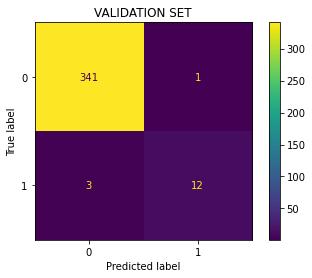

In [99]:
def calculate_metrics(clf_name, y_val_pred):
    # main metrics
    acc_ts = metrics.accuracy_score(y_val,y_val_pred)

    acc_bal_ts = metrics.balanced_accuracy_score(y_val,y_val_pred)

    dfacc =  pd.DataFrame([[acc_ts], [acc_bal_ts]], index= ['Accuracy', 'Balanced accuracy'],  columns=['Validation'])
    print(dfacc)

    print(f'\nMETRICS VALIDATION SET FOR {clf_name} MODEL:')
    CT.confusion_matrix(y_val, y_val_pred, labels=[1, 0])

def plot_matrix(clf):
    fig = plt.figure()
    ax = plt.subplot(1,1,1)
    ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax = ax)
    plt.title ('VALIDATION SET')
    
    plt.show()

INPUTS = df_val.columns[~df_val.columns.isin(['FESTIVO', 'FECHA', ''])]
OUTPUT = 'FESTIVO'
X_val = df_val[INPUTS]
y_val = df_val[OUTPUT]

loaded_gb = pickle.load(open("./models/gradient_boosting.pickle", "rb"))
y_val_pred_gb = loaded_gb.predict(X_val).tolist()

calculate_metrics('GRADIENT BOOSTING', y_val_pred_gb)
plot_matrix(loaded_gb)


In [100]:
#--------------------------NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|
# En primer lugar cargamos los mejores modelos de cada uno de los puntos anteriores para realizar la validación
loaded_tree = pickle.load(open("./models/simple_tree_f1.pickle", "rb"))
loaded_rf = pickle.load(open("./models/random_forest_v2.pickle", "rb"))
loaded_gb = pickle.load(open("./models/gradient_boosting.pickle", "rb"))
loaded_stacking = pickle.load(open("./models/stacked_reg_model01.pickle", "rb"))

In [101]:
# Ejecutamos un predict de todos los modelos para ver los resultados
y_val_pred_tree = loaded_tree.predict(X_val).tolist()
# y_val_pred_rf = loaded_rf.predict(X_val).tolist()

y_val_pred_rf = pipe_balanced.predict(X_val).tolist()

y_val_pred_gb = loaded_gb.predict(X_val).tolist()
y_val_pred_stacking = loaded_stacking.predict(X_val).tolist()

In [102]:
# model predictions in training (TR) and test (TS) sets
clf = loaded_gb
y_train_pred = clf.predict(X_train[INPUTS]).tolist()
y_test_pred = clf.predict(X_test[INPUTS]).tolist()

# main metrics
acc_tr = metrics.accuracy_score(y_train,y_train_pred)
acc_ts = metrics.accuracy_score(y_test,y_test_pred)

acc_bal_tr = metrics.balanced_accuracy_score(y_train,y_train_pred)
acc_bal_ts = metrics.balanced_accuracy_score(y_test,y_test_pred)

dfacc =  pd.DataFrame([[acc_tr, acc_ts], [acc_bal_tr, acc_bal_ts]], index= ['Accuracy', 'Balanced accuracy'],  columns=['TR', 'TS'])
print(dfacc)

print('\nMETRICS TRAINING:')
CT.confusion_matrix(y_train, y_train_pred, labels=[1,0])
print('\nMETRICS TEST SET:')
CT.confusion_matrix(y_test, y_test_pred, labels=[1,0])

                    TR        TS
Accuracy           1.0  0.982639
Balanced accuracy  1.0  0.845114

METRICS TRAINING:
Confusion Matrix and Statistics
	   Prediction
 Reference    1    0
         1 2211    0
         0    0 2211

Accuracy: 1.0
No Information Rate: 0.5
P-Value [Acc > NIR]: 0.0
Kappa: 1.0
Mcnemar's Test P-Value: 1.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Recall: 1.0
Prevalence: 0.5
Detection Rate: 0.5
Detection prevalence: 0.5
Balanced accuracy: 1.0
F1 Score: 1.0
Positive label: 1

METRICS TEST SET:
Confusion Matrix and Statistics
	   Prediction
 Reference  1   0
         1 16   7
         0  3 550

Accuracy: 0.98
No Information Rate: 0.93
P-Value [Acc > NIR]: 0.0
Kappa: 0.75
Mcnemar's Test P-Value: 0.34
Sensitivity: 0.99
Specificity: 0.7
Precision: 0.84
Recall: 0.7
Prevalence: 0.96
Detection Rate: 0.95
Detection prevalence: 0.97
Balanced accuracy: 0.85
F1 Score: 0.76
Positive label: 1


In [103]:
def calculate_metrics(clf_name, y_val_pred):
    # main metrics
    acc_ts = metrics.accuracy_score(y_val,y_val_pred)

    acc_bal_ts = metrics.balanced_accuracy_score(y_val,y_val_pred)

    dfacc =  pd.DataFrame([[acc_ts], [acc_bal_ts]], index= ['Accuracy', 'Balanced accuracy'],  columns=['Validation'])
    print(dfacc)

    print(f'\nMETRICS VALIDATION SET FOR {clf_name} MODEL:')
    CT.confusion_matrix(y_val, y_val_pred, labels=[1, 0])

In [104]:
def plot_matrix(clf):
    fig = plt.figure()
    ax = plt.subplot(1,1,1)
    ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax = ax)
    plt.title ('VALIDATION SET')
    
    plt.show()

In [105]:
calculate_metrics('TREE', y_val_pred_tree)

                   Validation
Accuracy             0.966387
Balanced accuracy    0.727485

METRICS VALIDATION SET FOR TREE MODEL:
Confusion Matrix and Statistics
	   Prediction
 Reference  1   0
         1  7   8
         0  4 338

Accuracy: 0.97
No Information Rate: 0.93
P-Value [Acc > NIR]: 0.26
Kappa: 0.52
Mcnemar's Test P-Value: 0.39
Sensitivity: 0.99
Specificity: 0.47
Precision: 0.64
Recall: 0.47
Prevalence: 0.96
Detection Rate: 0.95
Detection prevalence: 0.97
Balanced accuracy: 0.73
F1 Score: 0.54
Positive label: 1


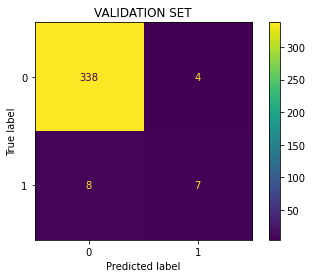

In [106]:
plot_matrix(loaded_tree)

In [107]:
calculate_metrics('RANDOM FOREST', y_val_pred_rf)

                   Validation
Accuracy             0.983193
Balanced accuracy    0.800000

METRICS VALIDATION SET FOR RANDOM FOREST MODEL:
Confusion Matrix and Statistics
	   Prediction
 Reference  1   0
         1  9   6
         0  0 342

Accuracy: 0.98
No Information Rate: 0.93
P-Value [Acc > NIR]: 0.01
Kappa: 0.74
Mcnemar's Test P-Value: 0.03
Sensitivity: 1.0
Specificity: 0.6
Precision: 1.0
Recall: 0.6
Prevalence: 0.96
Detection Rate: 0.96
Detection prevalence: 0.97
Balanced accuracy: 0.8
F1 Score: 0.75
Positive label: 1


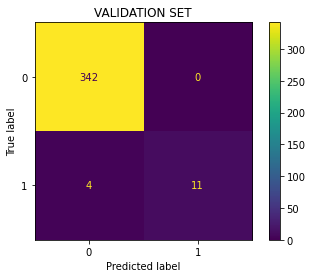

In [108]:
plot_matrix(loaded_rf)

In [109]:
calculate_metrics('GRADIENT BOOSTING', y_val_pred_gb)

                   Validation
Accuracy             0.988796
Balanced accuracy    0.898538

METRICS VALIDATION SET FOR GRADIENT BOOSTING MODEL:
Confusion Matrix and Statistics
	   Prediction
 Reference  1   0
         1 12   3
         0  1 341

Accuracy: 0.99
No Information Rate: 0.92
P-Value [Acc > NIR]: 0.0
Kappa: 0.85
Mcnemar's Test P-Value: 0.62
Sensitivity: 1.0
Specificity: 0.8
Precision: 0.92
Recall: 0.8
Prevalence: 0.96
Detection Rate: 0.96
Detection prevalence: 0.96
Balanced accuracy: 0.9
F1 Score: 0.86
Positive label: 1


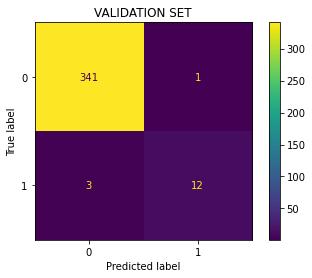

In [110]:
plot_matrix(loaded_gb)

In [23]:
calculate_metrics('STACKING', y_val_pred_stacking)

                   Validation
Accuracy             0.960784
Balanced accuracy    0.533333

METRICS VALIDATION SET FOR STACKING MODEL:
Confusion Matrix and Statistics
	   Prediction
 Reference  1   0
         1  1  14
         0  0 342

Accuracy: 0.96
No Information Rate: 0.96
P-Value [Acc > NIR]: 0.46
Kappa: 0.12
Mcnemar's Test P-Value: 0.0
Sensitivity: 1.0
Specificity: 0.07
Precision: 1.0
Recall: 0.07
Prevalence: 0.96
Detection Rate: 0.96
Detection prevalence: 1.0
Balanced accuracy: 0.53
F1 Score: 0.12
Positive label: 1


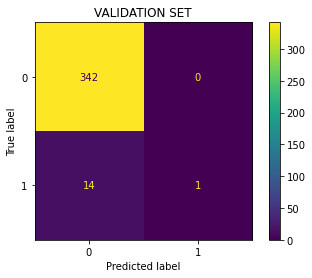

In [24]:
plot_matrix(loaded_stacking)

#### 2.2. Análisis de los días peor clasificados
- Indica en una tabla la lista de los días que se han clasificado incorrectamente por cada uno de los modelos considerados
- Comenta las posibles diferencias y semejanzas, intentando buscar una justificación de por qué ha ocurrido el error de clasificación
- Muestra gráficamente los perfiles de 24 horas de los 3 días más difíciles de clasificar para los modelos, comparándolos con lo esperado según el día de la semana correspondiente

In [29]:
#--------------------------NO ESCRIBAS LÍNEAS DE CÓDIGO MÁS LARGAS QUE LO QUE OCUPA ESTA LÍNEA -----------------------------|
